In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df = pd.read_csv("E:/Userfiles/Download/forestfires (2).csv")

In [3]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.shape

(517, 31)

In [5]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

EDA

In [7]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep')])

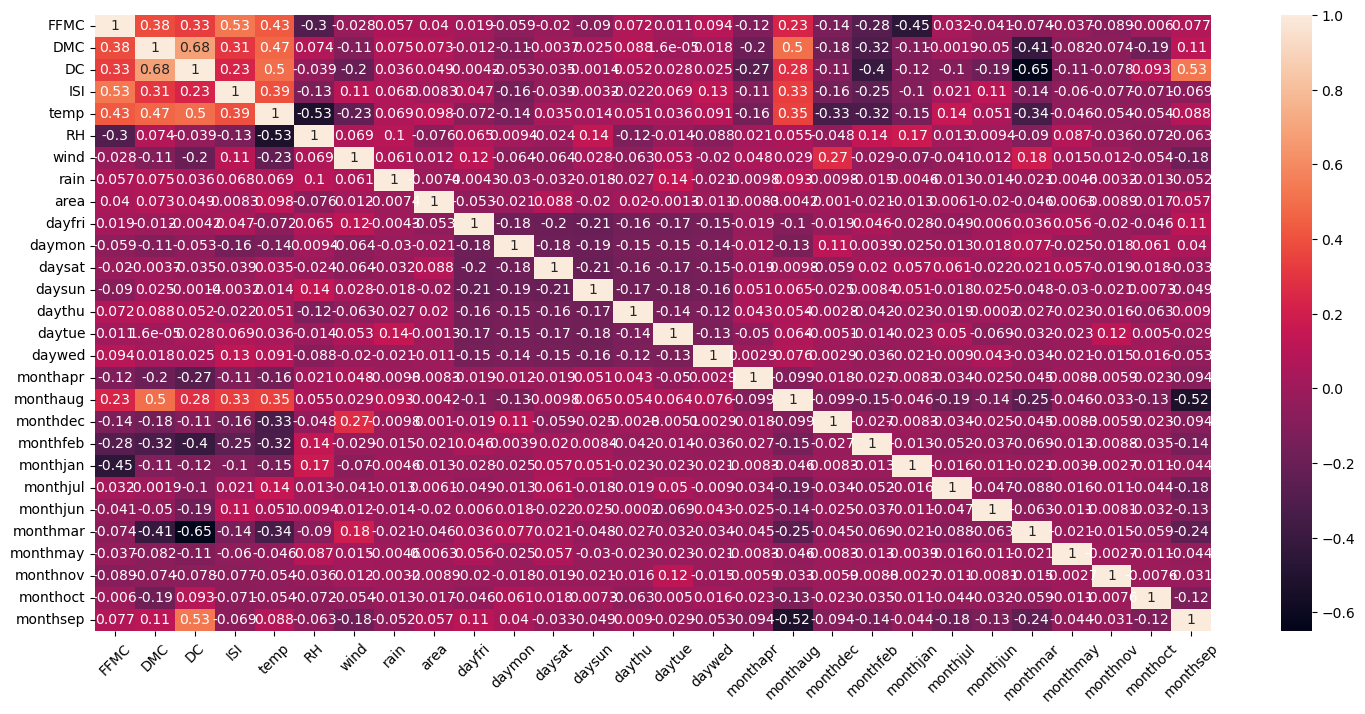

In [9]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)

In [10]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [11]:
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

,size_category,counts
0,small,378
1,large,139


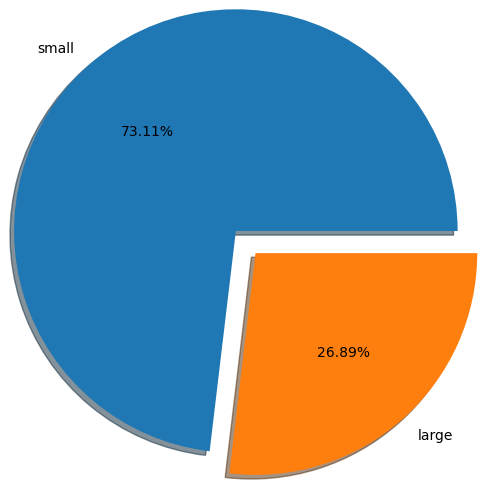

In [12]:
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1.5)
y_count

In [13]:
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


Text(0.5, 1.02, 'Num of fires in each month')

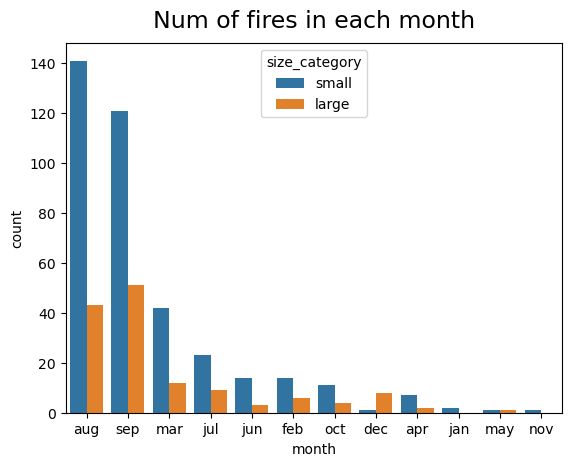

In [14]:
sns.barplot(x='month', y = 'count', hue='size_category', data=month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)

In [15]:
day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


Text(0.5, 1.02, 'Num of fires on each day')

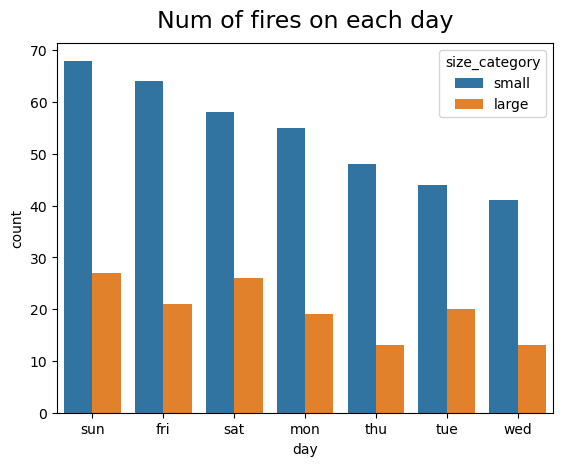

In [16]:
sns.barplot(x='day', y = 'count', hue='size_category', data=day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)

In [17]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df['size_category']  

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [18]:
rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


Text(0.5, 1.02, 'Rainfall level in diff category of forest')

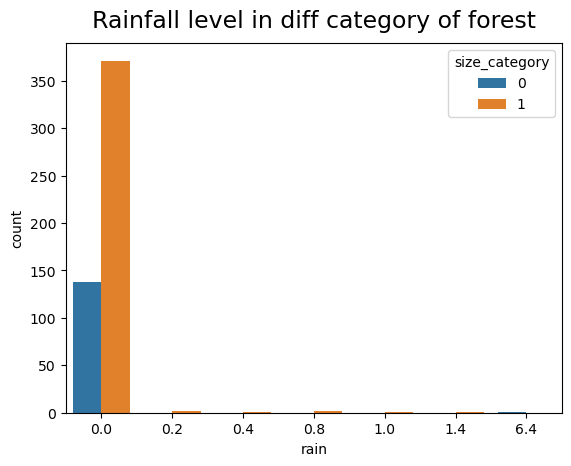

In [19]:
sns.barplot(x='rain', y='count', hue='size_category', data=rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)

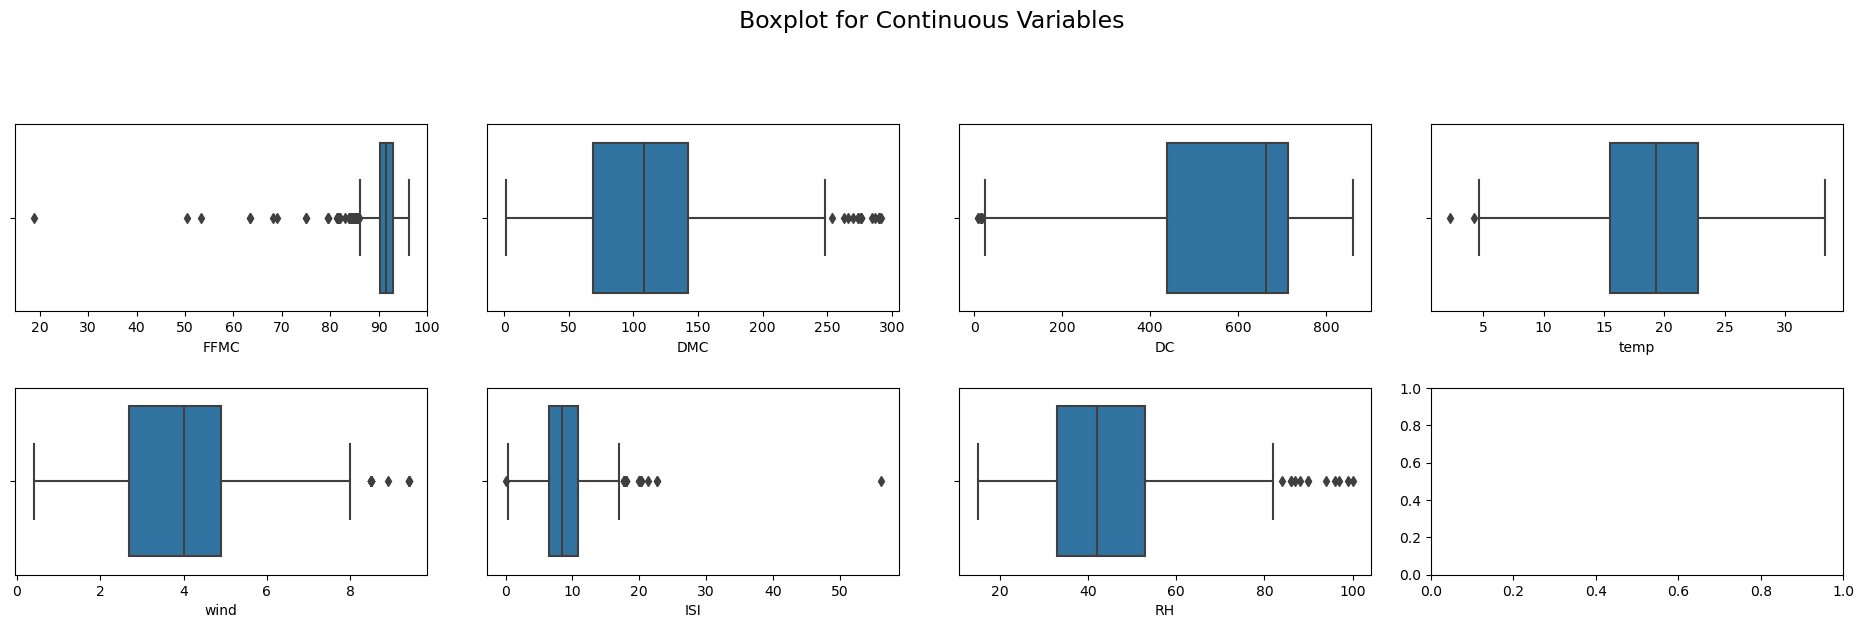

In [20]:
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.temp, ax=ax[0,3])
sns.boxplot(df.wind, ax=ax[1,0])
sns.boxplot(df.ISI, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)
     

In [21]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [22]:
df1 = df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [23]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


Text(0.5, 1.01, 'Correlation plot of Target variable with other continuous features')

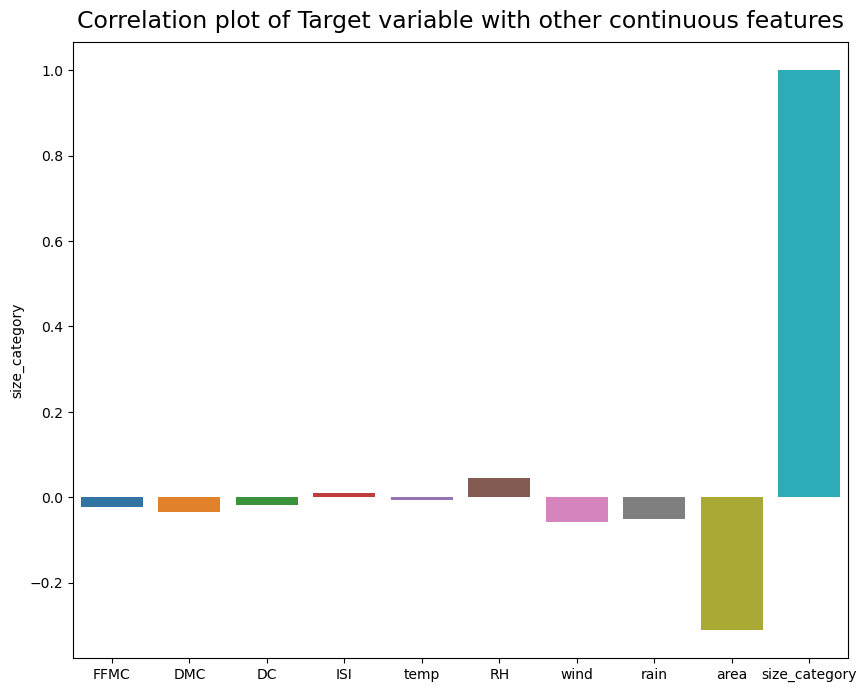

In [24]:
fig , ax=plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)

Text(0.5, 1.0, 'Correlation Map of Numerical variables')

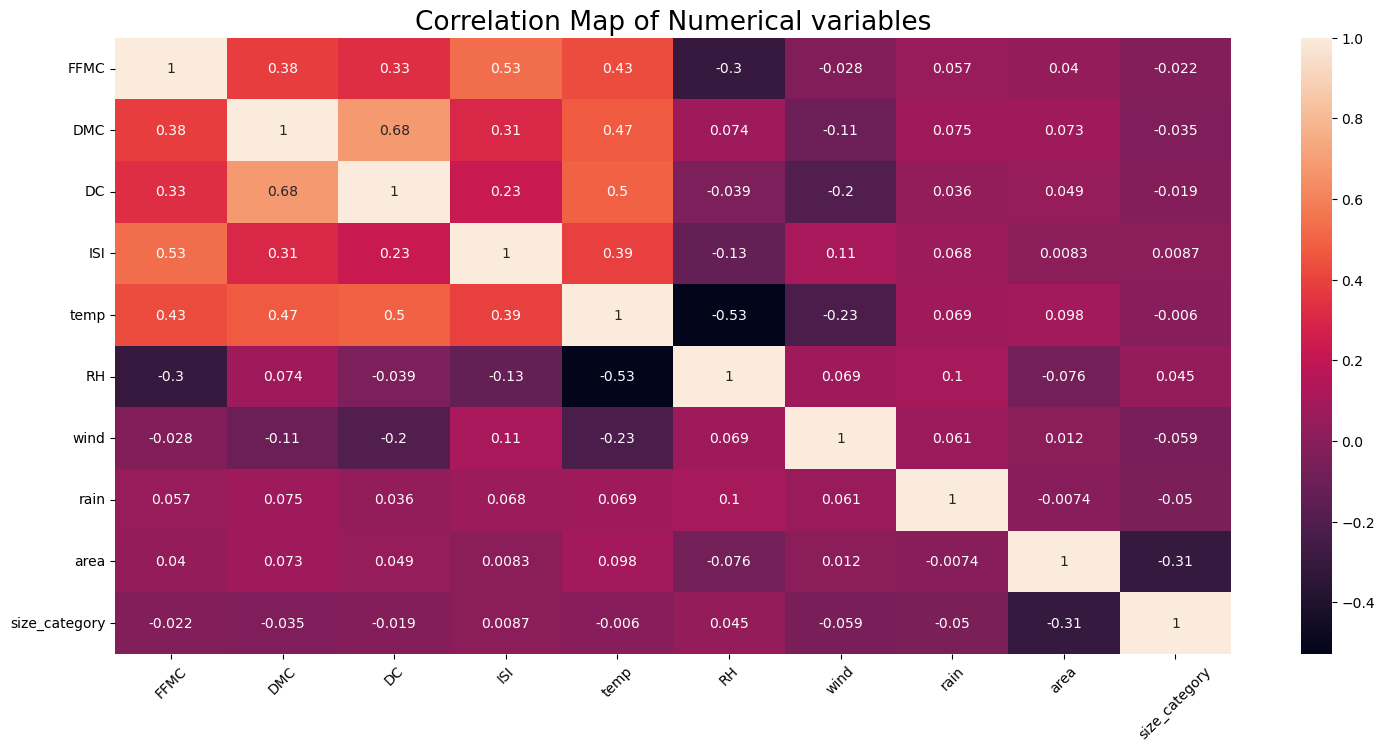

In [25]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19)

Text(0.5, 1.01, 'Pairplot for all numerical variables')

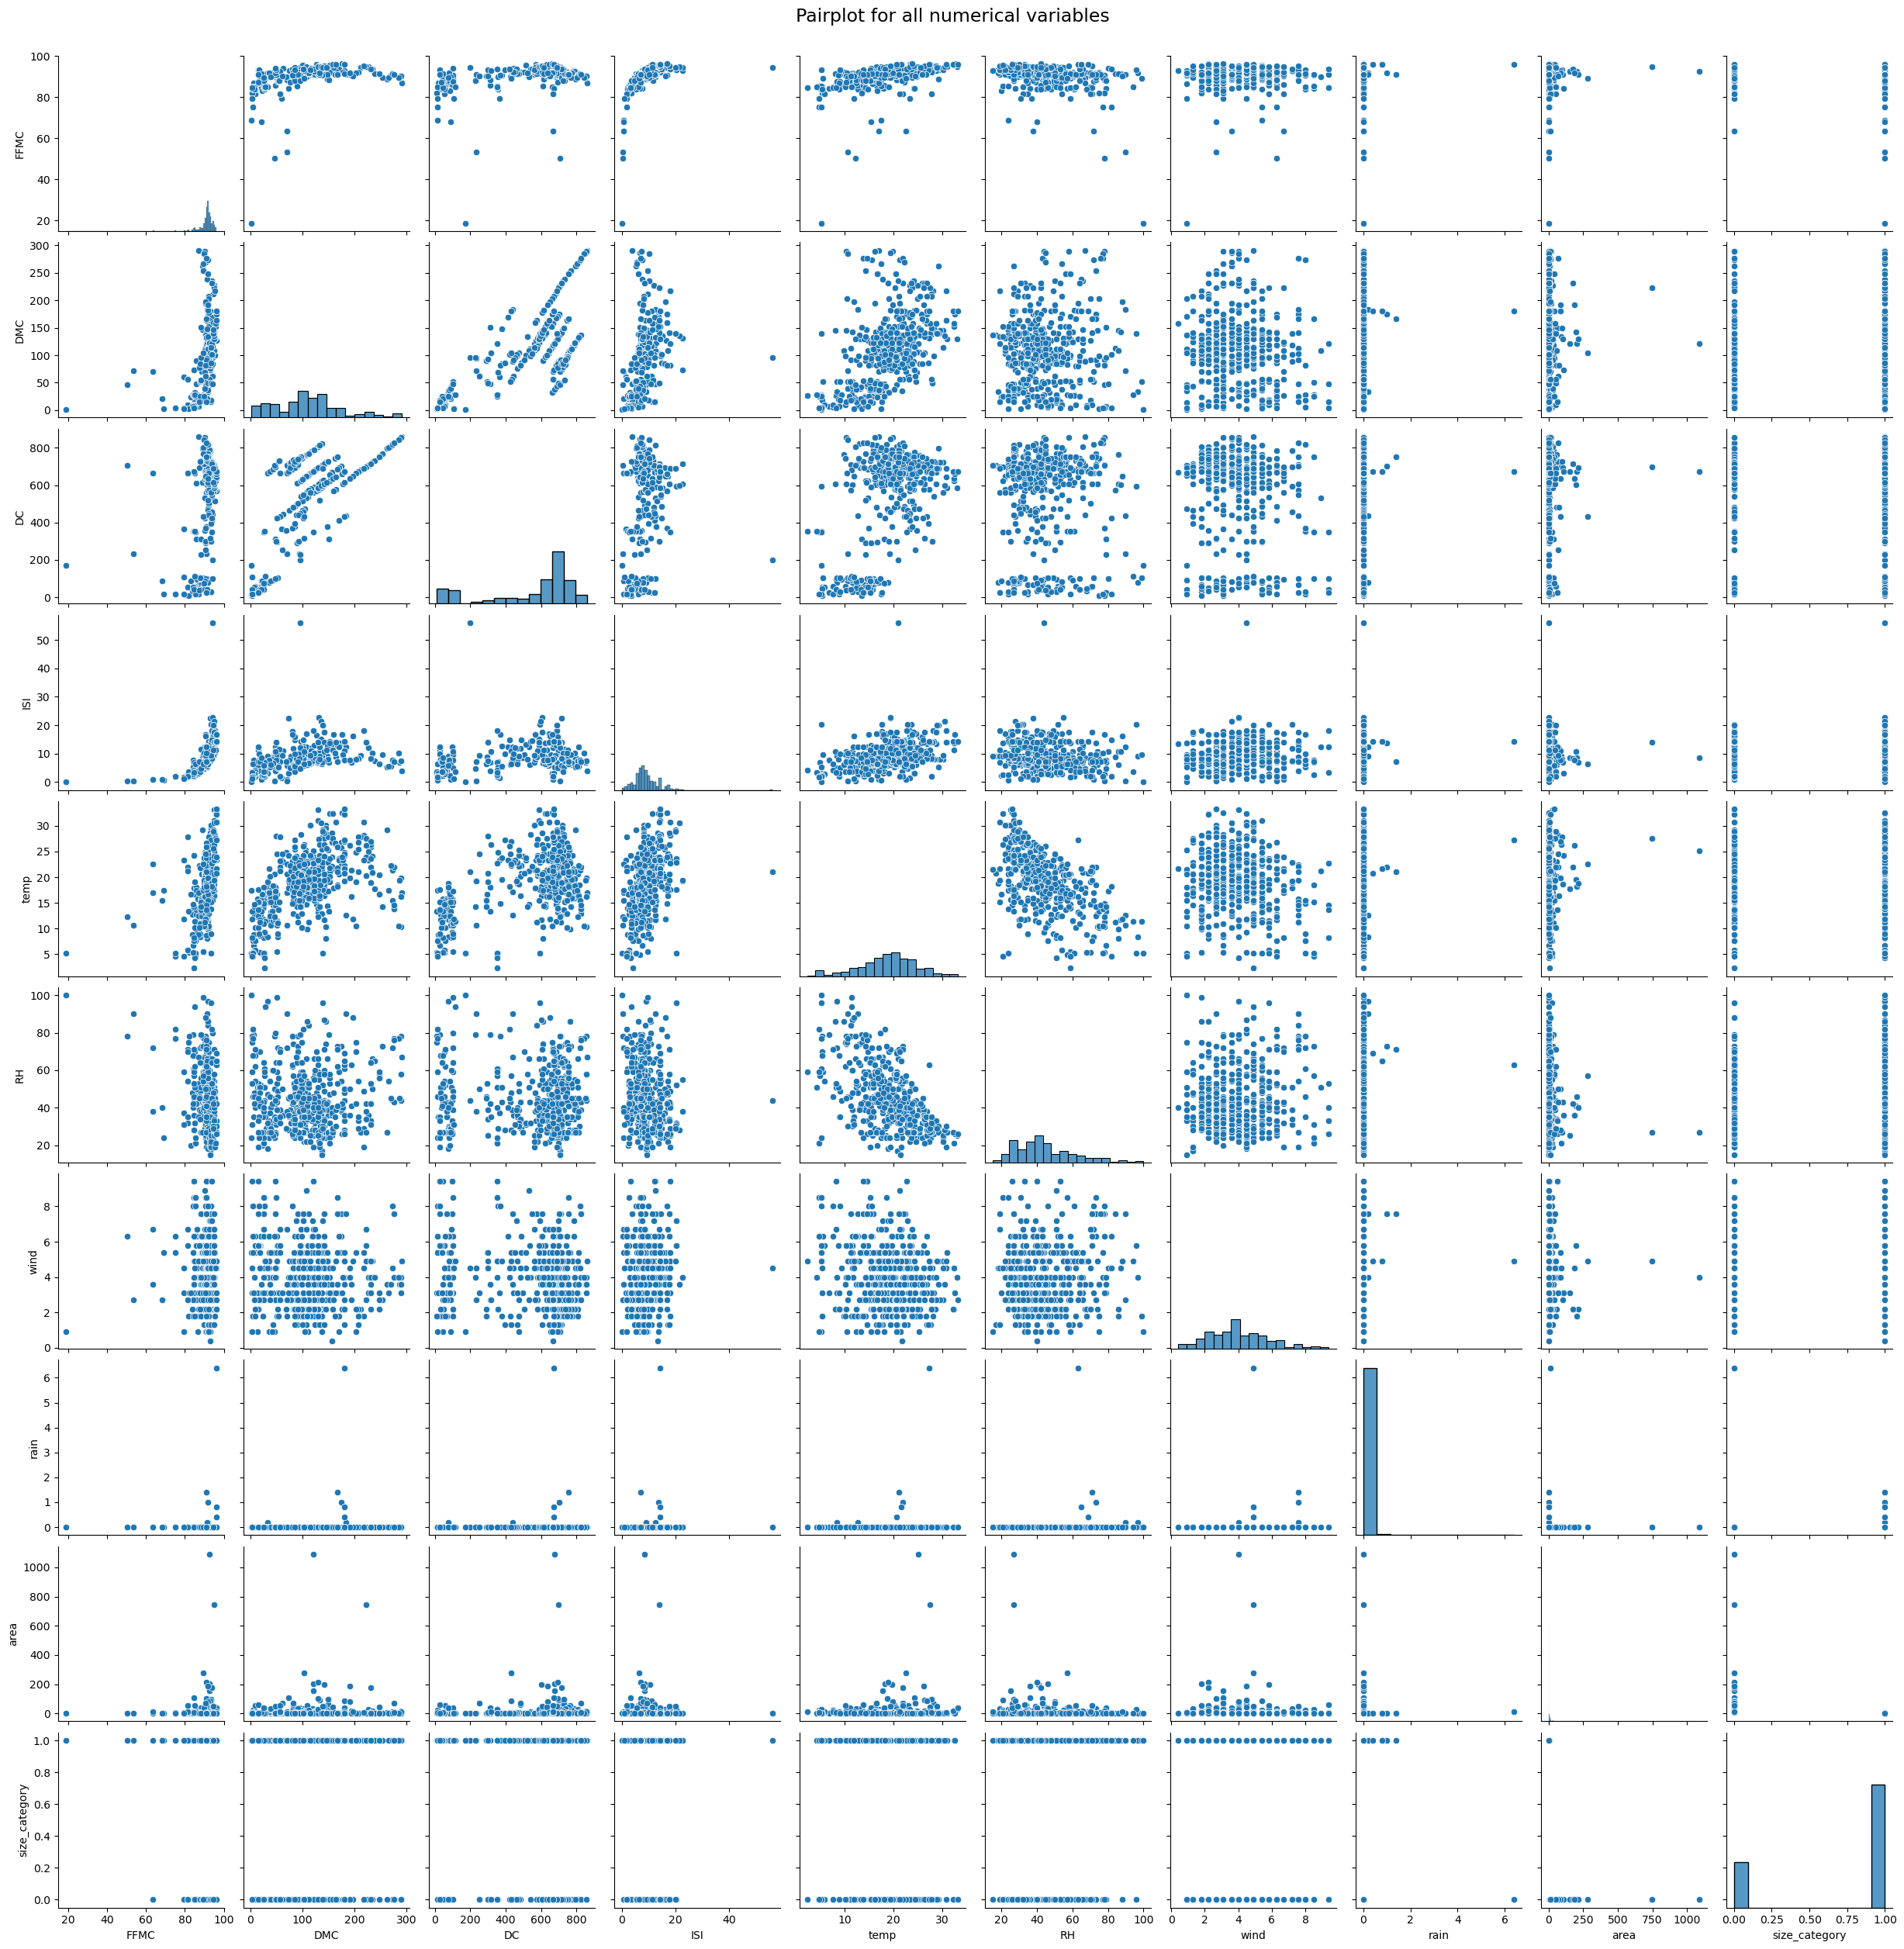

In [26]:
sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)

In [27]:
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)

In [28]:
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]

In [29]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,...,0,0,0,0,0,0,0,0,0,-1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,...,0,0,1,0,0,0,0,0,1,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,...,1,0,0,0,0,0,0,0,1,-1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,...,1,0,0,0,0,0,0,0,1,-1
469,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,0,...,0,0,0,0,0,0,0,0,0,-1


In [30]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [31]:
df.drop([281, 299, 379, 463, 464, 469], inplace = True,axis=0 )

In [32]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
x = df.drop('size_category', axis=1)
y = df['size_category']

In [34]:
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)           
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)  

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((383, 26), (128, 26), (383,), (128,))

In [37]:
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
     

In [38]:
from keras.layers import Dropout

# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=26, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [39]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.740 total time=   2.6s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.727 total time=   1.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.805 total time=   1.7s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.724 total time=   2.1s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.671 total time=   3.7s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.922 total time=   3.8s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.857 total time=   3.8s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.948 total time=   3.8s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.895 total time=   3.4s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.921 total time=   3.6s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=0.961 total time=   5.5s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.870 total time=   6.1s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.961 total time=   6.0s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.947 total time=   5.7s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.961 total time=   6.3s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.740 total time=   1.3s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.688 total time=   1.3s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.792 total time=   1.4s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.724 total time=   1.4s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.671 total time=   1.3s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=0.883 total time=   2.4s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.805 total time=   2.1s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.870 total time=   2.2s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.855 total time=   5.5s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.868 total time=   2.3s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=0.935 total time=   3.8s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.883 total time=   3.6s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.935 total time=   4.8s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.921 total time=   4.2s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.908 total time=   3.6s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=0.740 total time=   1.0s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.688 total time=   1.1s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.779 total time=   0.9s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.724 total time=   1.1s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.671 total time=   1.0s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.818 total time=   1.6s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.727 total time=   1.5s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.766 total time=   1.6s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.803 total time=   1.6s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.855 total time=   1.6s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=0.909 total time=   2.5s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.805 total time=   2.2s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.883 total time=   2.4s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.868 total time=   2.3s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.868 total time=   3.1s


In [40]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9400205016136169, using {'batch_size': 10, 'epochs': 100}
0.7334928274154663,0.042943311504900446 with: {'batch_size': 10, 'epochs': 10}
0.9086124300956726,0.030767515228983796 with: {'batch_size': 10, 'epochs': 50}
0.9400205016136169,0.03533476512284406 with: {'batch_size': 10, 'epochs': 100}
0.7231032133102417,0.042402448167311826 with: {'batch_size': 20, 'epochs': 10}
0.8564251661300659,0.027092696480594283 with: {'batch_size': 20, 'epochs': 50}
0.9164388179779053,0.019485900729564964 with: {'batch_size': 20, 'epochs': 100}
0.7205058097839355,0.03828797139408129 with: {'batch_size': 40, 'epochs': 10}
0.7939166069030762,0.04389965059734826 with: {'batch_size': 40, 'epochs': 50}
0.8668489575386047,0.0342204897908874 with: {'batch_size': 40, 'epochs': 100}


In [41]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 26,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.935 total time=   6.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.883 total time=   6.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.909 total time=  11.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.921 total time=   7.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.947 total time=   7.8s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.935 total time=   7.8s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.909 total time=   5.8s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.922 total time=   6.3s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.895 total time=   6.6s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.961 total time=   6.0s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.948 total time=   5.7s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.896 total time=   5.8s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.974 total time=   5.9s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.921 total time=   6.3s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.961 total time=   5.9s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.948 total time=   6.2s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.883 total time=   5.9s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.948 total time=   6.9s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.934 total time=   7.0s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.947 total time=  10.7s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.935 total time=   6.9s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.922 total time=   6.5s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.961 total time=   6.5s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.934 total time=   6.9s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.947 total time=   6.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.948 total time=   6.5s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.896 total time=   6.5s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.922 total time=   6.4s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.947 total time=   6.3s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.934 total time=   6.2s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.961 total time=   6.5s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.909 total time=   6.4s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.961 total time=   5.9s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.961 total time=   6.1s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.934 total time=   6.3s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.961 total time=   6.7s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.909 total time=   6.1s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.948 total time=   6.0s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.921 total time=   6.2s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.961 total time=   6.2s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.974 total time=   8.2s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.896 total time=   7.5s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.961 total time=   8.1s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.934 total time=   6.9s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.974 total time=   7.9s


In [42]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9478127121925354, using {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.919138765335083,0.022148378391480747 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9242993712425231,0.02253202983974393 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9399521470069885,0.028034926407838213 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9321599483489991,0.02508319700742867 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9399521470069885,0.013236273111947002 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9295625448226928,0.019266607747095793 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.945181131362915,0.020790721712620006 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9399521470069885,0.021180938468447322 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9478127121925354,0.02963180659360075 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [43]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 26,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.870 total time=   7.9s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.792 total time=   9.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.818 total time=   8.1s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.816 total time=   7.9s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.842 total time=   7.0s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.844 total time=   7.8s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.805 total time=   7.4s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.844 total time=   7.0s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.816 total time=   7.1s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.842 total time=   7.8s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=0.779 total time=   7.0s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.688 total time=   7.4s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.818 total time=   6.8s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.816 total time=   7.9s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.776 total time=   9.1s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=0.961 total time=  12.5s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.896 total time=   7.1s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.961 total time=   6.8s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.934 total time=   7.4s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.947 total time=   7.2s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=0.974 total time=   6.5s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.896 total time=   6.9s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.948 total time=   6.9s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.934 total time=   6.5s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.934 total time=   6.6s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=0.740 total time=   6.5s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.688 total time=   6.5s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.779 total time=   6.3s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.724 total time=   6.4s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.671 total time=   6.3s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=0.987 total time=   6.9s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.935 total time=   6.2s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.974 total time=   6.3s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.974 total time=   6.1s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.961 total time=   6.6s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=0.974 total time=   6.3s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.935 total time=   8.0s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.974 total time=   8.6s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.974 total time=   7.2s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.947 total time=   7.0s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=0.740 total time=   6.9s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.688 total time=   6.8s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.779 total time=   7.5s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.724 total time=   6.7s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.671 total time=   7.2s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=0.987 total time=   7.2s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.948 total time=   7.2s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.974 total time=   7.2s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.947 total time=   6.5s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.974 total time=   6.3s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.987 total time=   6.6s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.935 total time=   6.8s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.974 total time=   6.4s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.961 total time=   6.6s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.961 total time=   7.1s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=0.740 total time=   7.0s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.688 total time=   6.2s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.779 total time=   8.2s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.724 total time=  10.6s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.671 total time=   7.1s


In [44]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.966062867641449, using {'activation_function': 'tanh', 'init': 'uniform'}
0.8276828408241272,0.02645736189969792 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8302802443504333,0.016517618070396856 with: {'activation_function': 'softmax', 'init': 'normal'}
0.775563907623291,0.04703459862879584 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9399521589279175,0.024082943864445313 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9373205780982972,0.025221439383337572 with: {'activation_function': 'relu', 'init': 'normal'}
0.7205058097839355,0.03828797139408129 with: {'activation_function': 'relu', 'init': 'zero'}
0.966062867641449,0.01761777389831032 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9608338952064515,0.016483630810463314 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7205058097839355,0.03828797139408129 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9660287022590637,0.01571160317992675 with: {'activat

In [45]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)
     

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.974 total time=   7.8s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.948 total time=   7.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.974 total time=   7.5s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=   7.4s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=   6.7s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.974 total time=   6.7s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.961 total time=   6.4s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.974 total time=   6.3s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.961 total time=  10.0s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.974 total time=   6.9s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.974 total time=   7.0s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.935 total time=   6.8s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.974 total time=   6.9s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.947 total time=   6.6s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.974 total time=   8.5s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.974 total time=   7.4s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.935 total time=   6.3s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.974 total time=   7.0s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.961 total time=  13.4s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.961 total time=   8.1s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.974 total time=   6.9s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.948 total time=   7.6s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.961 total time=   7.1s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.974 total time=   8.8s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.961 total time=   8.4s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.987 total time=   8.4s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.948 total time=   6.9s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.974 total time=   7.3s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.974 total time=   6.8s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.961 total time=   7.3s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.974 total time=   7.4s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.948 total time=   7.5s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.974 total time=   6.4s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.947 total time=   7.3s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.961 total time=   7.7s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.987 total time=   7.0s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.948 total time=   6.8s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.974 total time=   6.5s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.961 total time=   6.4s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.947 total time=   6.4s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.974 total time=   9.2s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.935 total time=   8.1s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.974 total time=   7.7s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.974 total time=   7.7s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.961 total time=   8.3s


In [46]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9686602711677551, using {'neuron1': 4, 'neuron2': 4}
0.9634312868118287,0.009776472514749956 with: {'neuron1': 4, 'neuron2': 2}
0.9686602711677551,0.006435330331440546 with: {'neuron1': 4, 'neuron2': 4}
0.9608338952064515,0.016483630810463314 with: {'neuron1': 4, 'neuron2': 8}
0.9608338832855224,0.014228781715571012 with: {'neuron1': 8, 'neuron2': 2}
0.9634654641151428,0.009675229823603186 with: {'neuron1': 8, 'neuron2': 4}
0.9686602711677551,0.013279441932706033 with: {'neuron1': 8, 'neuron2': 8}
0.9607997179031372,0.01177155240233226 with: {'neuron1': 16, 'neuron2': 2}
0.9633971214294433,0.015305661260022285 with: {'neuron1': 16, 'neuron2': 4}
0.9634654641151428,0.015117545227611962 with: {'neuron1': 16, 'neuron2': 8}


In [49]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model

model.fit(x_train,y_train)

# Predicting using trained model

y_predict = model.predict(x_test)


# Printing the metrics

print("Test Accuracy:", accuracy_score(y_test,y_predict))

4/4 [==============================] - 0s 2ms/step
Test Accuracy: 0.953125


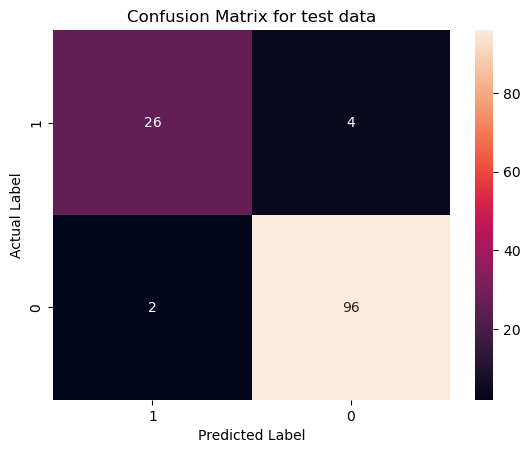

In [50]:
cm_df=confusion_matrix(y_test, y_predict)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [51]:
y_hat = model.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, y_hat))

12/12 [==============================] - 0s 2ms/step
Train Accuracy: 0.9947780678851175


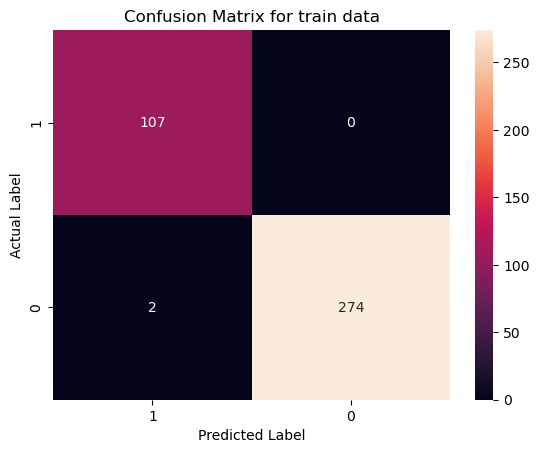

In [52]:
cm_df=confusion_matrix(y_train, y_hat)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()